In [2]:
#Load the necessary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#Load the dataset
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [34]:
# Shape of the dataset
df.shape

(9994, 12)

**Read the columns or Features of the dataset**

In [31]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [30]:
df.drop(columns="Postal Code",inplace=True)

In [32]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Read the number of unique values**

In [6]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Region"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


**Some statistical information**

Understanding the distribution of the data: The mean, min, max, and other metrics provide a quick overview of the distribution of the data.

Outlier detection: The min, 25%, 75%, and max values can help identify outliers in the data.

Data normalization: The mean and std values can be used to normalize the data.

Feature scaling: The min, max, and other values can be used to scale the features to a suitable range.

In [7]:
#Statistical description of the data
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


 **Checking data type and missing values**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


 **Null Value check**

In [35]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Read the Duplicate value**

In [36]:
df.duplicated().sum()

50

**Read the categorical features**

In [38]:
df_cat = df[[ 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
           'Category', 'Sub-Category', 'Sales','Profit']]

In [39]:
df_cat.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2.5164


**Read the number of unique values**

In [41]:
# shown the number of unique values in categorical data
for feature in df_cat.columns:
    print(feature,':',df[feature].nunique())

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Category : 3
Sub-Category : 17
Sales : 5825
Profit : 7287


In [43]:
df['Region'].nunique()

4

# **Exploratory Data Analysis - EDA**

In [44]:
# Read the first 5 samples or rows
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [45]:
# Read the last 5 samples or rows
df.tail()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


**What are the top selling products in the superstore?**

In [47]:
# Group the data by State and sum up the sales by product
product_group = df.groupby(["State"]).sum()["Sales"]
product_group.head()

State
Alabama        19510.6400
Arizona        35282.0010
Arkansas       11678.1300
California    457687.6315
Colorado       32108.1180
Name: Sales, dtype: float64

In [48]:
# Sort the data by sales in descending order
top_selling_products = product_group.sort_values(ascending=False)
top_5_selling_products = pd.DataFrame(top_selling_products.head())
top_5_selling_products

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140


<AxesSubplot:xlabel='Region'>

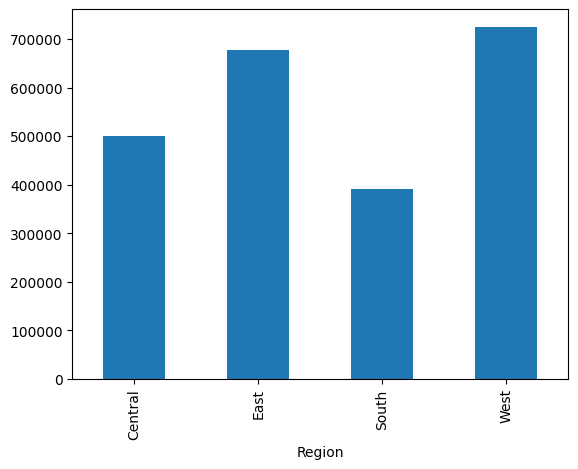

In [10]:
#Sales analysis based on Region
df.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Region'>

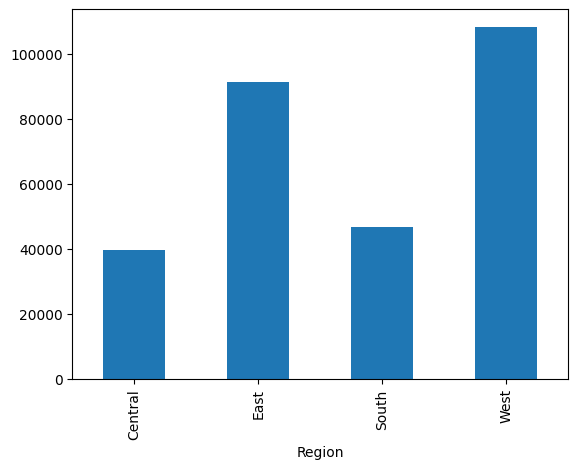

In [11]:
#Profit analysis based on Region
df.groupby("Region")["Profit"].sum().plot.bar()

<AxesSubplot:ylabel='Sales'>

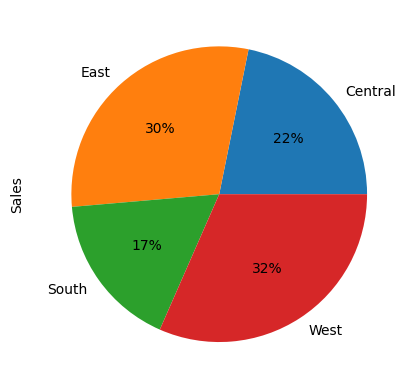

In [12]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:ylabel='Profit'>

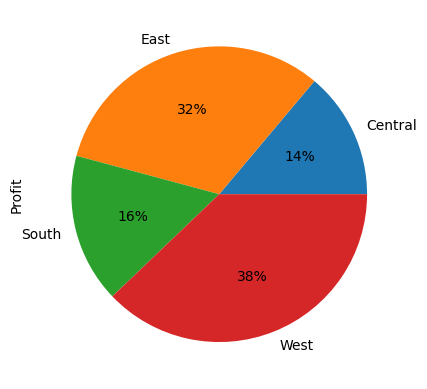

In [13]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:xlabel='Segment'>

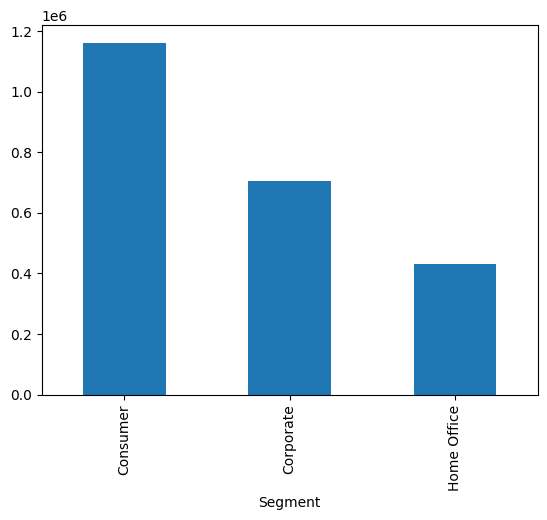

In [14]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Segment'>

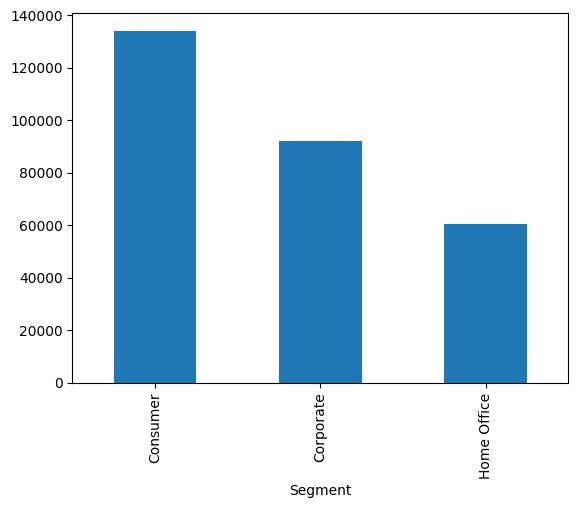

In [15]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

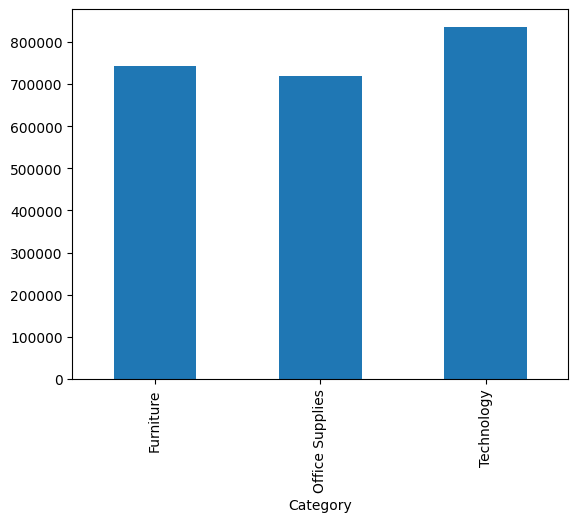

In [16]:
df.groupby("Category")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

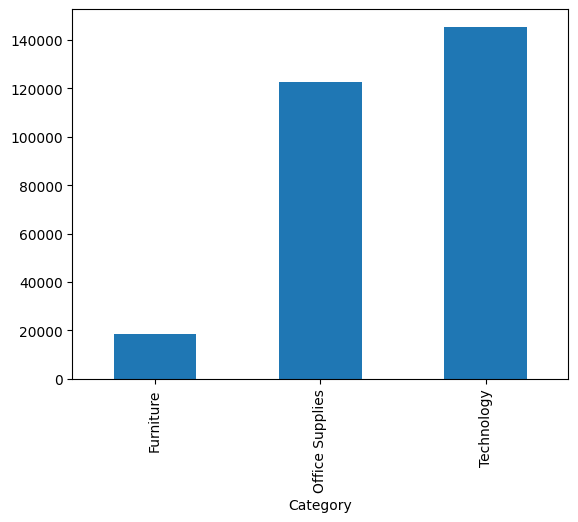

In [17]:
df.groupby("Category")["Profit"].sum().plot.bar()

<AxesSubplot:ylabel='Sales'>

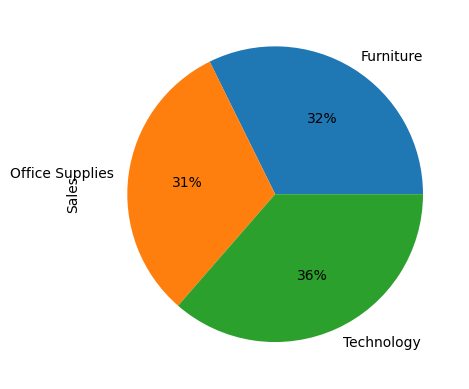

In [18]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:ylabel='Profit'>

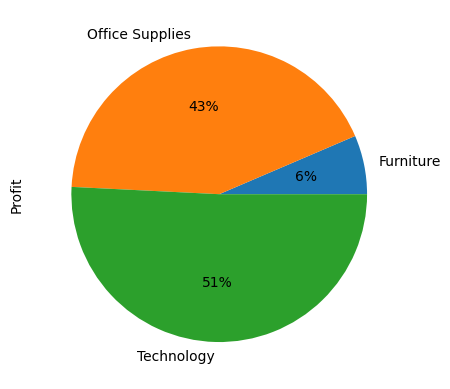

In [19]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:xlabel='State'>

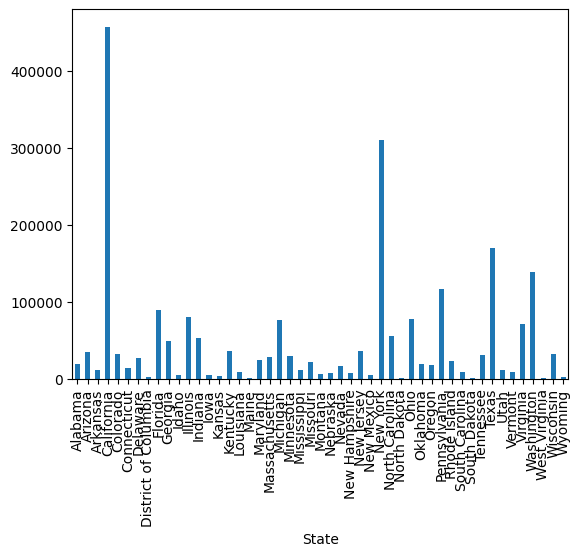

In [20]:
df.groupby("State")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='State'>

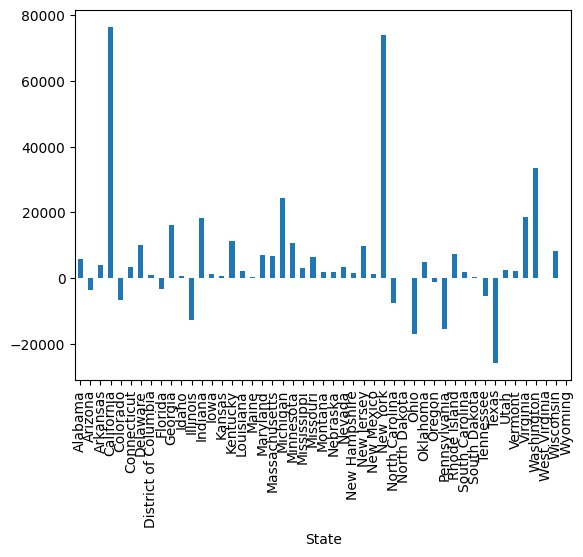

In [21]:
df.groupby("State")["Profit"].sum().plot.bar()

In [56]:
df.Region.value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

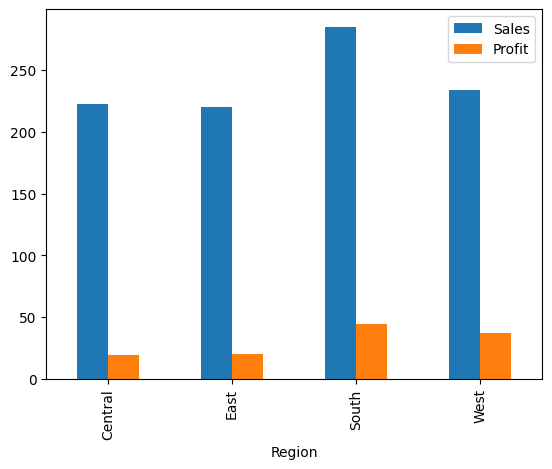

In [58]:
# Filter the data to only include the Canon imageCLASS 2200 Advanced Copier
product = df[df["Ship Mode"] == "Second Class"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean()[["Sales", "Profit"]]

# Ploting
region_group.plot(kind="bar")

plt.show()

**Which region & place generates the most sales?**

In [61]:
df_places = df[['Country','City','State','Region']]
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [62]:
for place in df_places.columns:
    print(place,':',df_places[place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [63]:
df_places = df[['City','State','Region','Sales','Profit']]
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


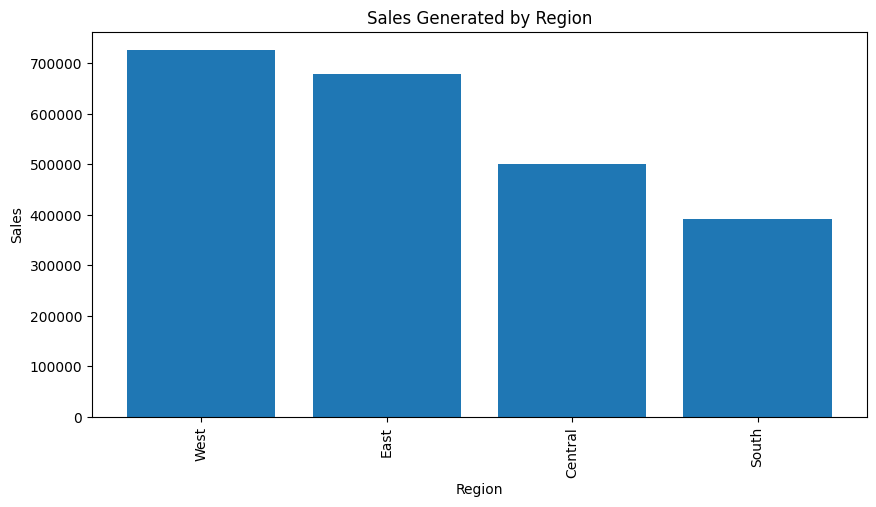

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
0,Central,501239.8908,39706.3625
2,South,391721.9050,46749.4303


In [64]:
# Group the data by Region and City and calculate the total sales for each group
region_sales = df_places.groupby(['Region'], as_index=False).sum()
region_sales.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales geProfitnerated by each region and city
plt.figure(figsize=(10,5))
plt.bar(region_sales['Region'], region_sales['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by Region")
plt.xticks(rotation=90)
plt.show()
region_sales

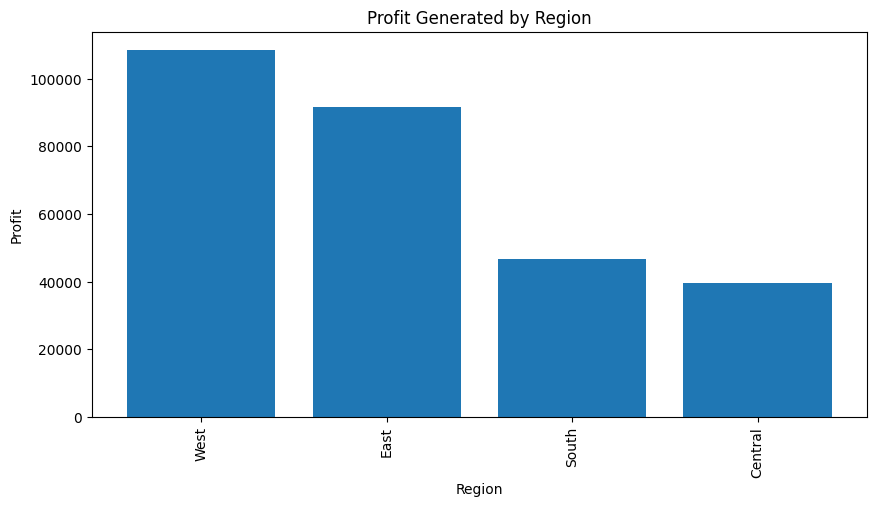

,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
2,South,391721.9050,46749.4303
0,Central,501239.8908,39706.3625


In [65]:
# Group the data by Region and City and calculate the total sales for each group
region_profit = df_places.groupby(['Region'], as_index=False).sum()
region_profit.sort_values(by='Profit', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(region_profit['Region'], region_profit['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by Region")
plt.xticks(rotation=90)
plt.show()
region_profit

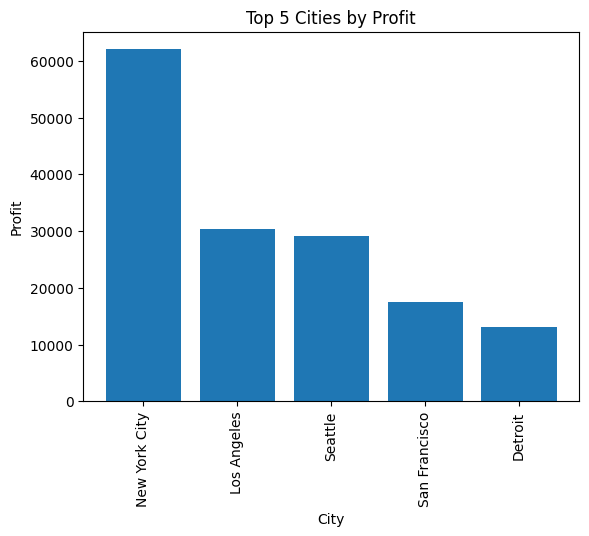

,City,Sales,Profit
329,New York City,256368.161,62036.9837
266,Los Angeles,175851.341,30440.7579
452,Seattle,119540.742,29156.0967
438,San Francisco,112669.092,17507.3854
123,Detroit,42446.944,13181.7908


In [66]:
city_profit = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
city_profit.sort_values(by='Profit', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities_profit =city_profit.head()

plt.bar(top_5_cities_profit['City'], top_5_cities_profit['Profit'], align='center')
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Top 5 Cities by Profit")
plt.xticks(rotation=90)

plt.show()
top_5_cities_profit

**Top places are :**

**Cities:** [New York City, Los Angeles, Seattle, San Francisco, Detroit]

**State :** [california, New York]

**Region :** [West]

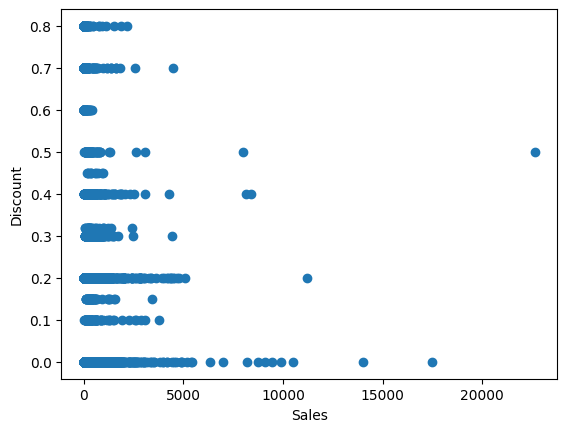

In [67]:
# Create a scatter plot between sales and discounts
plt.scatter(df['Sales'],df['Discount'])

plt.ylabel("Discount")
plt.xlabel("Sales")
plt.show()

In [68]:
# Group the data by product category and calculate the average profit for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit'].sum()

print(avg_profit_margin_by_category)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


Text(0, 0.5, 'Average Profit Margin')

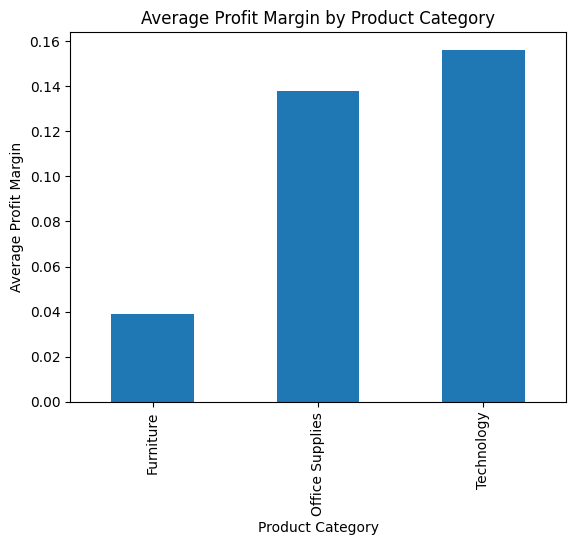

In [69]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean()

# Plot the average profit margin for each category as a bar chart
avg_profit_margin_by_category.plot(kind='bar')

# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

In [72]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')

In [73]:
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


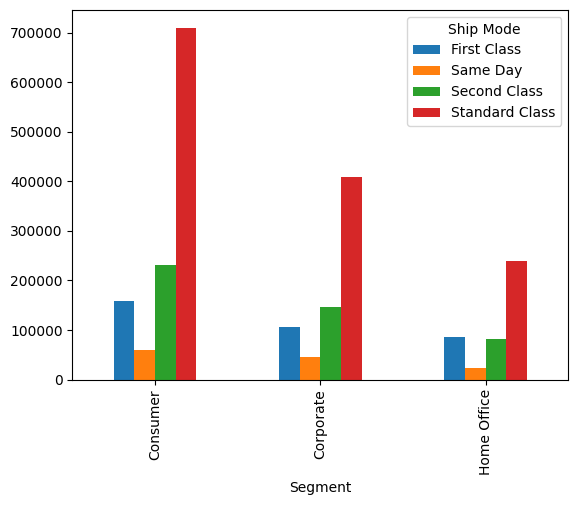

In [74]:
# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False)
plt.show()

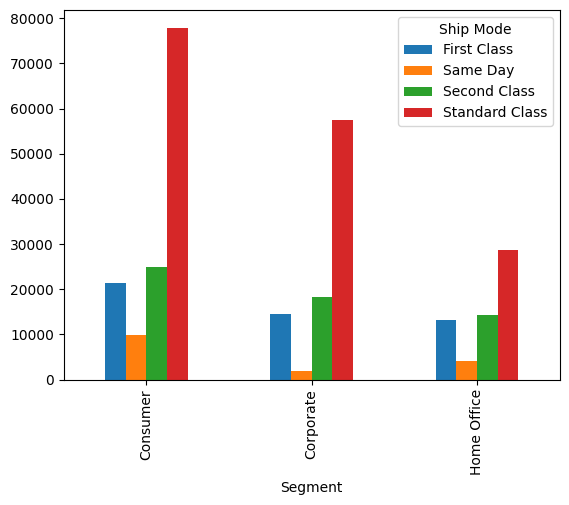

In [75]:
#profit
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')

pivot_table.plot(kind='bar', stacked=False)

# Show the plot
plt.show()